In [1]:
from Library import Algorithm, Cloud, Manifolds
import numpy as np
import math

import matplotlib.pyplot as plt

In [2]:
def inverse(x, t):

    y = np.zeros((2, 2))

    y[0] = x.copy()
    y[1] = x.copy()


    if(np.isnan(x[0])):

        if(abs(t[0] - math.cos(x[1])) < 1):
            y[0, 0] = math.acos(t[0] - math.cos(x[1]))
            y[1, 0] = - math.acos(t[0] - math.cos(x[1]))

    else:
        if(abs(t[0] - math.cos(x[0])) < 1):
            y[0, 1] = math.acos(t[0] - math.cos(x[0]))
            y[1, 1] = - math.acos(t[0] - math.cos(x[0]))

    return y

def Jx(x, t):
    J = np.zeros((1, 2))
    J[0, 0] = - math.sin(x[0])
    J[0, 1] = - math.sin(x[1])

    return J

def Jt(x, t):
    J = np.zeros((1, 1))
    J[0, 0] = 1

    return J


In [3]:
N = 20

h = 2*6.14/N

xs = [np.linspace(-3.14, 3.14, N), np.linspace(-3.14, 3.14, N)]
x0s = [np.linspace(-3.14, 3.14, 20), np.linspace(-3.14, 3.14, 20)]

t = Cloud.carteisan_product([np.linspace(-2, 2, N)])


slices = Cloud.GetSlicesInverse(xs, t, inverse, 1)
cloud = Cloud.Slices2Pointcloud(slices)

100%|██████████| 200/200 [00:03<00:00, 62.23it/s]


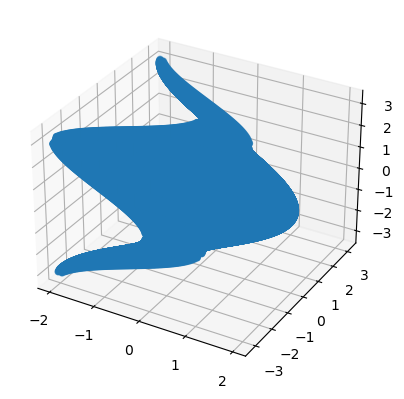

In [4]:
#render cloud in 3d space

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cloud = np.array(cloud)

ax.scatter(cloud[:, 0], cloud[:, 1], cloud[:, 2])

plt.show()

In [5]:
dx = np.array([h, h])

borders = Algorithm.GetBordersInverse(xs, t, dx, inverse, 1, Jx, Jt)

 12%|█▎        | 25/200 [00:00<00:02, 65.17it/s]


KeyboardInterrupt: 

In [ ]:
print(borders)


([array([-1.98994975]), array([-1.9798995]), array([-1.96984925]), array([-1.98994975]), array([-1.96984925]), array([-1.94974874]), array([-1.92964824]), array([-1.94974874]), array([-1.92964824]), array([-1.90954774]), array([-1.88944724]), array([-1.90954774]), array([-1.86934673]), array([-1.88944724]), array([-1.86934673]), array([-1.84924623]), array([-1.82914573]), array([-1.84924623]), array([-1.82914573]), array([-1.80904523]), array([-1.78894472]), array([-1.80904523]), array([-1.76884422]), array([-1.78894472]), array([-1.76884422]), array([-1.74874372]), array([-1.72864322]), array([-1.74874372]), array([-1.72864322]), array([-1.70854271]), array([-1.68844221]), array([-1.70854271]), array([-1.66834171]), array([-1.68844221]), array([-1.66834171]), array([-1.64824121]), array([-1.6281407]), array([-1.64824121]), array([-1.6281407]), array([-1.6080402]), array([-1.5879397]), array([-1.6080402]), array([-1.5678392]), array([-1.5879397]), array([-1.54773869]), array([-1.567839